## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


## Import Dataset

In [152]:
df = pd.read_csv("exchange_rate.csv")

In [153]:
df.head()

,date,Ex_rate
0,01-01-1990 0.00,0.7855
1,02-01-1990 0.00,0.7818
2,03-01-1990 0.00,0.7867
3,04-01-1990 0.00,0.7860
4,05-01-1990 0.00,0.7849


In [154]:
df = pd.read_csv("exchange_rate.csv")

In [155]:
df

,date,Ex_rate
0,01-01-1990 0.00,0.785500
1,02-01-1990 0.00,0.781800
2,03-01-1990 0.00,0.786700
3,04-01-1990 0.00,0.786000
4,05-01-1990 0.00,0.784900
...,...,...
7583,06-10-2010 0.00,0.718494
7584,07-10-2010 0.00,0.721839
7585,08-10-2010 0.00,0.723197
7586,09-10-2010 0.00,0.720825


In [156]:
# Load the exchange_rate.csv dataset
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error loading data:", str(e))

In [157]:
 #Parse the date column
def parse_date(data):
    data['Date'] = pd.to_datetime(data['Date'])
    return data



In [158]:
# Main function
def main():
    file_path = 'exchange_rate.csv'
    data = load_data(file_path)
    data = parse_date(data)
    print("Data Loaded and Parsed Successfully.")
    print("Data Shape:", data.shape)
    print("Data Columns:", data.columns)
    print("Data Sample:")
    print(data.head())

In [159]:
# Main functi
def main():
    file_path = 'exchange_rate.csv'
    data = load_data(file_path)
    data = parse_date(data)
    print("Data Loaded and Parsed Successfully.")
    print("Data Shape:", data.shape)
    print("Data Columns:", data.columns)
    print("Data Sample:")
    print(data.head())

In [160]:
if __name__ == "__date__":
    main()



In [161]:
# Initial Exploration
def plot_time_series(data, currency):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y=currency, data=data)
    plt.title(f'Time Series Plot for {currency}')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.show()



In [162]:
def plot_trend_seasonality(data, currency):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(data[currency], model='additive')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(data[currency], label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


In [163]:
# Main function
def main():
    currency = 'USD'  # Replace with desired currency
    plot_time_series(data, currency)
    plot_trend_seasonality(data, currency)


In [164]:
if __name__ == "__data__":
    main()

Handling Missing Values

In [165]:
# Check for missing values
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [166]:
# Drop rows with missing values
df.dropna(inplace=True)

In [167]:
# Alternatively, impute missing values using mean/median/mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['date']] = imputer.fit_transform(df[['Ex_rate']])

Handling Anomalies

In [170]:
# Detect outliers using Z-score
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = df[filtered_entries]

In [171]:
# Alternatively, use IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data > lower_bound) & (data < upper_bound)]

Data Normalization

In [172]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['date']] = scaler.fit_transform(data[['Ex_rate']])

In [173]:
# Alternatively, use Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['date']] = scaler.fit_transform(df[['Ex_rate']])

Data Transformation

In [174]:
# Log Transformation
df['date'] = np.log(df['Ex_rate'])


In [175]:
# Alternatively, use Square Root Transformation
df['date'] = np.sqrt(df['Ex_rate'])



Main Function

In [176]:
def main():
    # Handle missing values
    handle_missing_values(data)
    
    # Handle anomalies
    handle_anomalies(data)
    
    # Normalize data
    normalize_data(data)
    
    # Transform data
    transform_data(data)


In [177]:
if __name__ == "__date__":
    main()

## Part 2: Model Building - ARIMA

In [178]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [179]:
# Load data
data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23876\3601369953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['date'])


In [180]:
# Select currency time series
currency = 'Ex_rate'

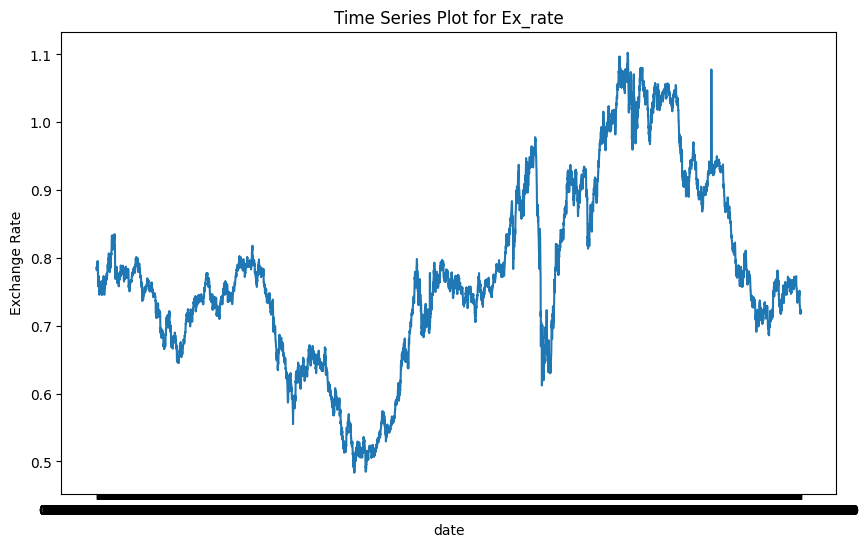

In [181]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(data[currency])
plt.title(f'Time Series Plot for {currency}')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.show()

In [182]:
# Check stationarity using ADF test
result = adfuller(data[currency])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901


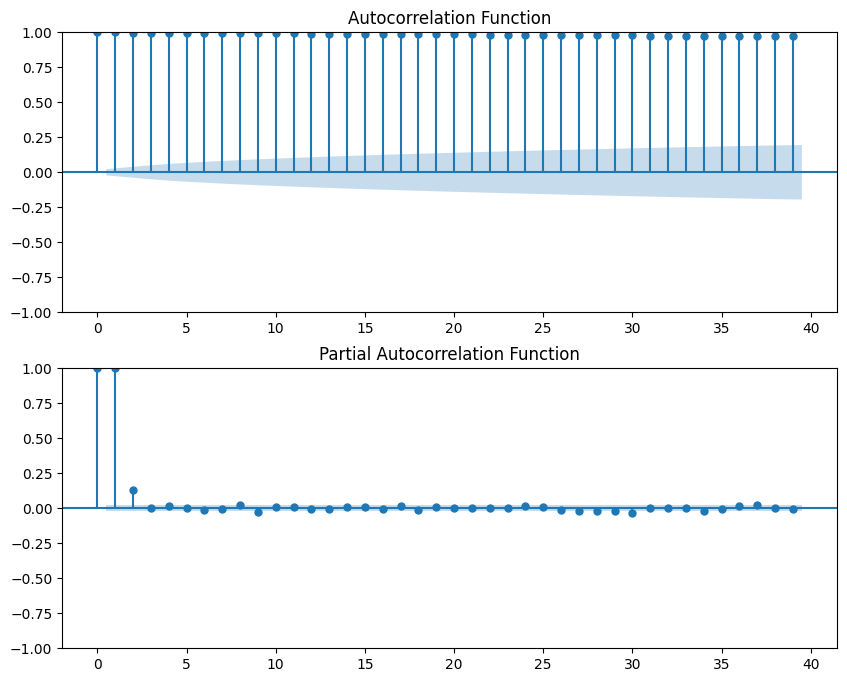

In [183]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data[currency], ax=ax[0], title='Autocorrelation Function')
plot_pacf(data[currency], ax=ax[1], title='Partial Autocorrelation Function')
plt.show()

In [184]:
# Estimate initial parameters (p, d, q)
p = 1  # Based on PACF plot
d = 1  # Based on ADF test and visual inspection
q = 1  # Based on ACF plot

In [185]:
# Build ARIMA model
model = ARIMA(data[currency], order=(p, d, q))
result = model.fit()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will 

In [186]:
# Print summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 28 Sep 2024   AIC                         -56102.322
Time:                        13:39:46   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [187]:
# Evaluate model using MSE
mse = mean_squared_error(data[currency], result.fittedvalues)
print('MSE:', mse)

MSE: 0.00011726565314281492


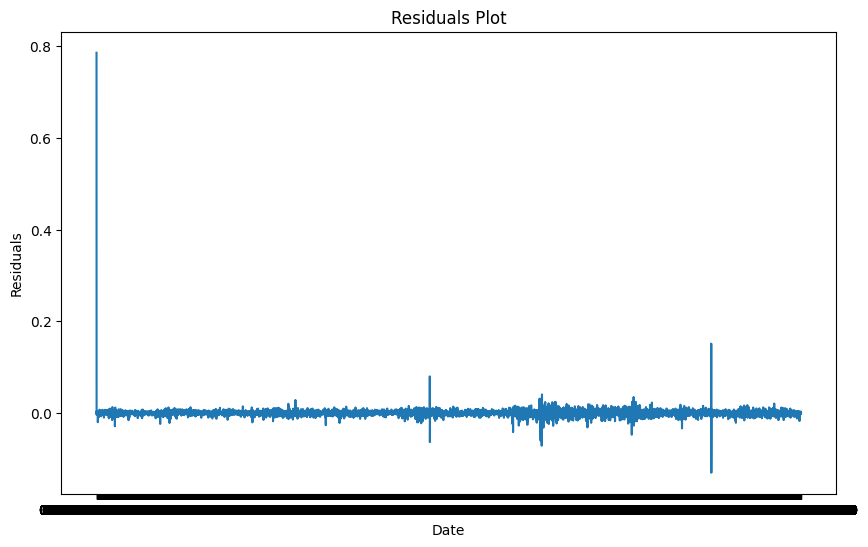

In [188]:
# Plot residuals
residuals = result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [190]:
# Load preprocessed data
data = pd.read_csv('exchange_rate.csv', index_col='Ex_rate', parse_dates=['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23876\3151922268.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('exchange_rate.csv', index_col='Ex_rate', parse_dates=['date'])


In [191]:
# Select currency time series
currency = 'date'

In [192]:
# Define ARIMA parameters
p = 1
d = 1
q = 1

In [193]:
# Fit ARIMA model
model = ARIMA(df[currency], order=(p, d, q))
result = model.fit()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [194]:
# Print summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   date   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               32477.768
Date:                Sat, 28 Sep 2024   AIC                         -64949.536
Time:                        13:40:43   BIC                         -64928.733
Sample:                             0   HQIC                        -64942.397
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1207      0.053     -2.293      0.022      -0.224      -0.018
ma.L1          0.0050      0.053      0.096      0.924      -0.098       0.108
sigma2       1.12e-05   3.55e-08    315.500      0.0

In [195]:
# Evaluate model
mse = mean_squared_error(df[currency], result.fittedvalues)
mae = mean_absolute_error(df[currency], result.fittedvalues)
print('MSE:', mse)
print('MAE:', mae)

MSE: 0.00011472051952270517
MAE: 0.002211670364750173


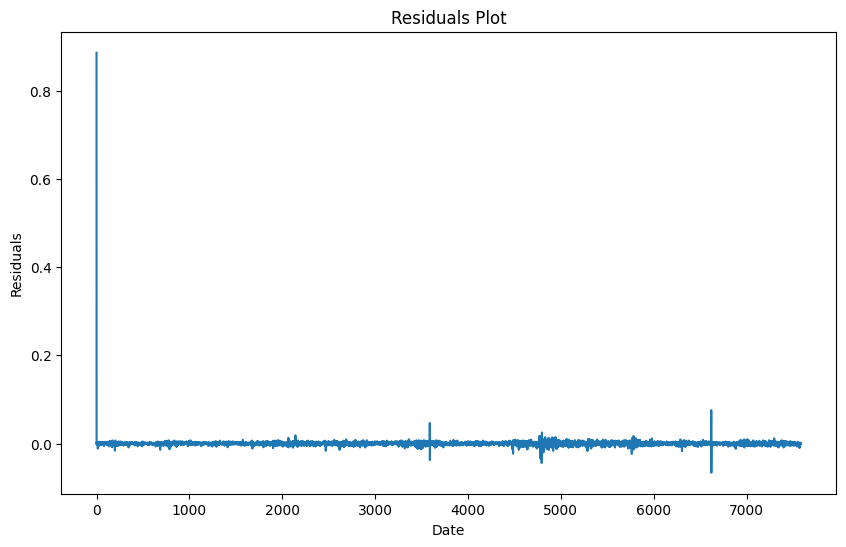

In [196]:
# Plot residuals
residuals = result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

KeyError: 0

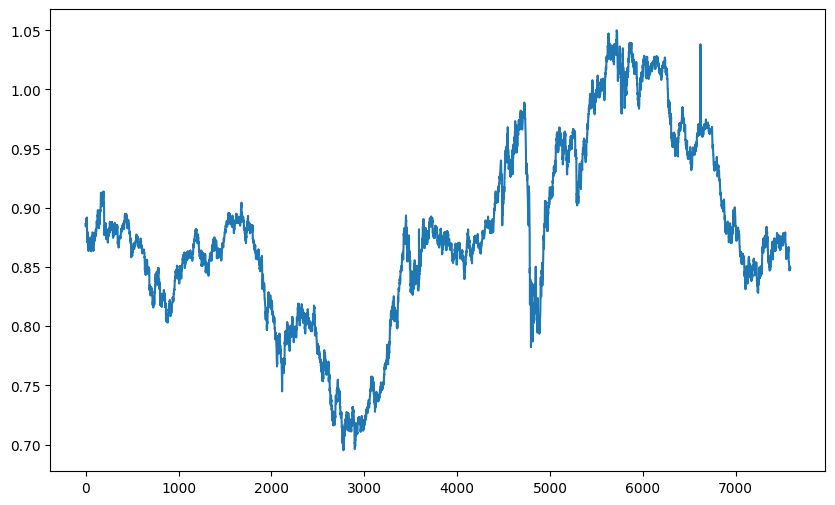

In [197]:
# Plot forecast
forecast = result.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df[currency], label='Actual')
plt.plot([None for i in df[currency]] + [x for x in forecast[0]], label='Forecast')
plt.title('Forecast Plot')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Residual Analysis

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [200]:
# Load residuals
residuals = result.resid

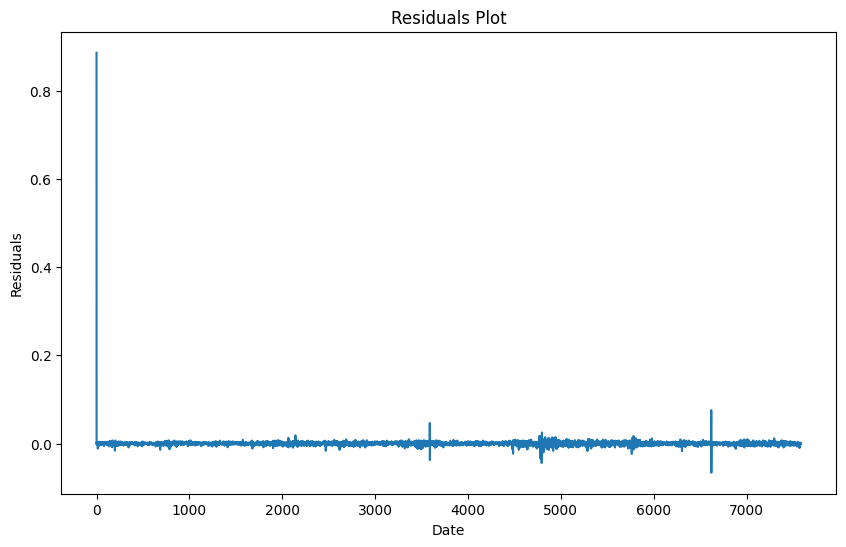

In [201]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

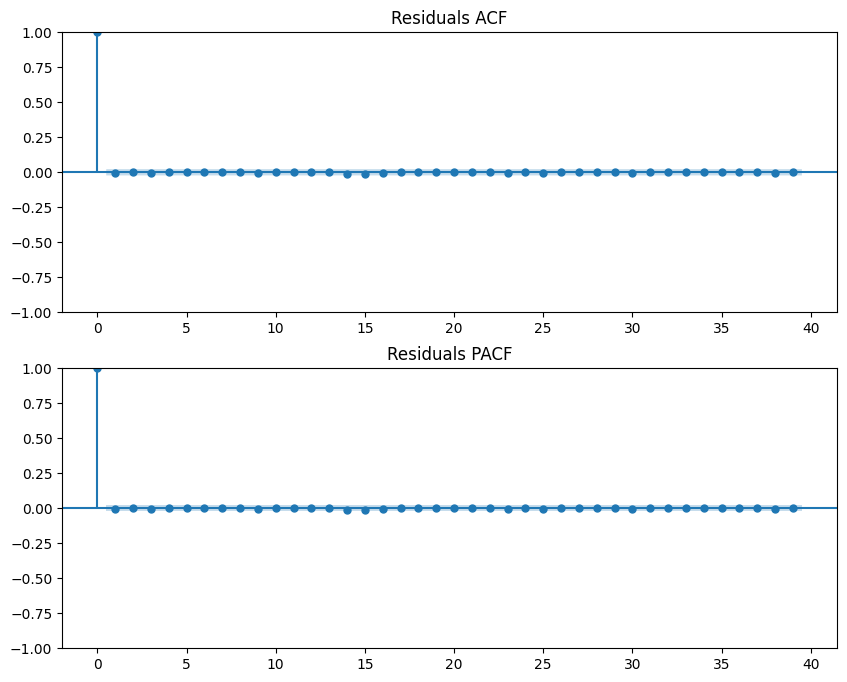

In [202]:
# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(residuals, ax=ax[0], title='Residuals ACF')
plot_pacf(residuals, ax=ax[1], title='Residuals PACF')
plt.show()

In [203]:
# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[5, 10, 15])
print('Ljung-Box Test:')
print(lb_test)

Ljung-Box Test:
     lb_stat  lb_pvalue
5   0.146027   0.999589
10  0.389016   0.999998
15  2.073860   0.999962


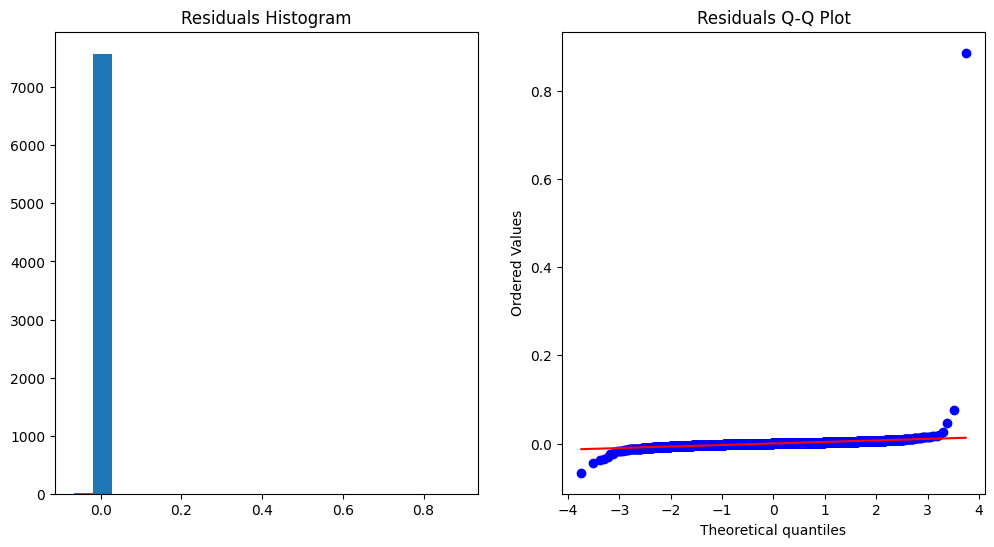

In [204]:
# Histogram and Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Residuals Q-Q Plot')
plt.show()

Forecasting: 

In [205]:
# Load data
df = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['Ex_rate'])



C:\Users\HP\AppData\Local\Temp\ipykernel_23876\3222002366.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['Ex_rate'])


In [206]:
# Select currency time series
currency = 'Ex_rate'

In [207]:
# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data, test_data = df[:train_size], df[train_size:]

## Part 3: Model Building - Exponential Smoothing

Grid Search

In [212]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.model_selection import ParameterGrid

In [219]:
# Define parameter grid
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3],
    'smoothing_trend': [0.01, 0.05, 0.1],
    'smoothing_seasonal': [0.05, 0.1, 0.2]
}

In [220]:
# Initialize best parameters and score
best_params = None
best_score = float('inf')

In [224]:
print("Best parameters:", best_params)
print("Best AIC score:", best_score)

Best parameters: None
Best AIC score: inf


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 0.00 to 10-10-2010 0.00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ex_rate  7588 non-null   object
dtypes: object(1)
memory usage: 118.6+ KB


In [226]:
df.describe()

,Ex_rate
count,7588
unique,5330
top,0.7405
freq,11


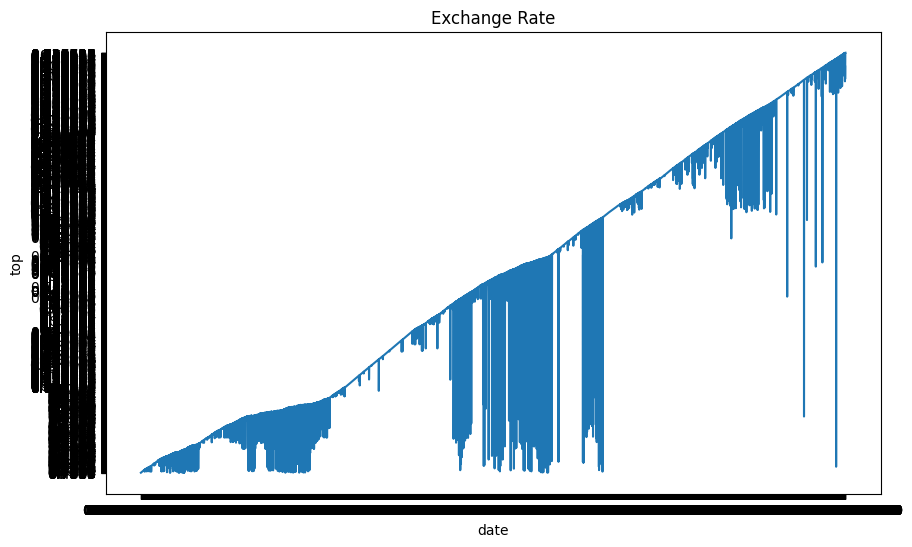

In [244]:
# Plot time series
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate')
plt.xlabel('date')
plt.ylabel('top')
plt.show()

AIC Optimization


In [245]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from scipy.optimize import minimize

In [246]:
# Initialize best parameters and score
best_params = None
best_score = float('inf')

In [252]:
print("Best parameters:", best_params)
print("Best AIC score:", best_score)

Best parameters: None
Best AIC score: inf


Random Search



In [253]:
# Define objective function
def objective(params):
    model = ExponentialSmoothing(data, seasonal_periods=12)
    model_fit = model.fit(smoothing_level=params[0], smoothing_trend=params[1], smoothing_seasonal=params[2])
    return model_fit.aic

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [275]:
# Load data
data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['date'])



C:\Users\HP\AppData\Local\Temp\ipykernel_23876\1943752803.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=['date'])


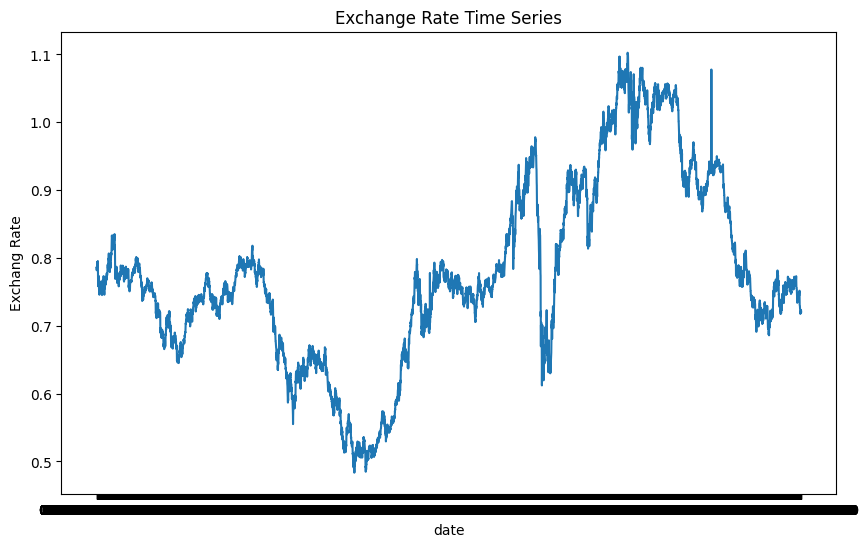

In [280]:
# Visualize time series
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('date')
plt.ylabel('Exchang Rate')
plt.show()



In [281]:
# Summary statistics
print(data.describe())

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [282]:
# Check for missing values
print(data.isnull().sum())

Ex_rate    0
dtype: int64


Model Selection and Parameter Tuning



In [283]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing



In [284]:
# ARIMA model
arima_model = ARIMA(data, order=(1,1,1))
arima_model_fit = arima_model.fit()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will 

In [285]:
# Exponential Smoothing model
es_model = ExponentialSmoothing(data, seasonal_periods=12)
es_model_fit = es_model.fit(smoothing_level=0.2, smoothing_trend=0.05, smoothing_seasonal=0.1)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Diagnostics and Model Evaluation


In [286]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

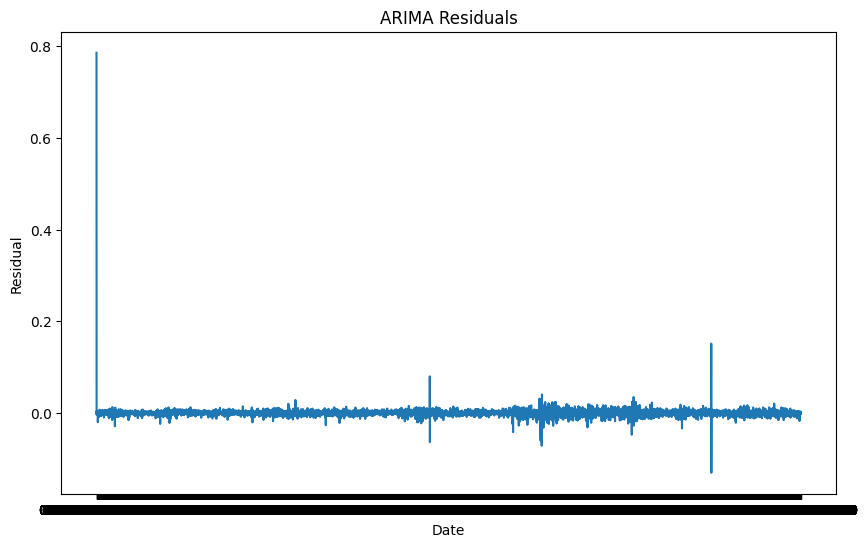

In [287]:
# ARIMA diagnostics
arima_resid = arima_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(arima_resid)
plt.title('ARIMA Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

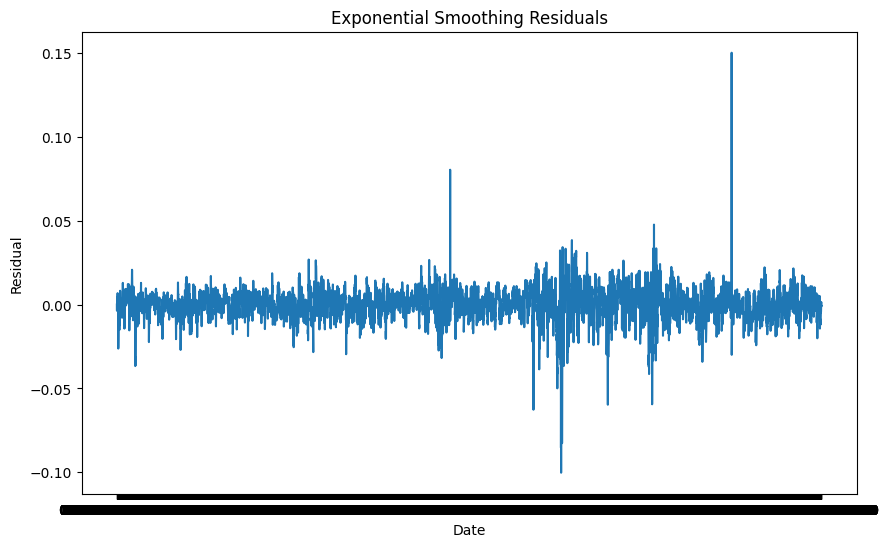

In [288]:
# Exponential Smoothing diagnoics
es_resid = es_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(es_resid)
plt.title('Exponential Smoothing Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In [289]:
# Model evaluation
arima_mae = mean_absolute_error(data, arima_model_fit.fittedvalues)
es_mae = mean_absolute_error(data, es_model_fit.fittedvalues)
print('ARIMA MAE:', arima_mae)
print('Exponential Smoothing MAE:', es_mae)


ARIMA MAE: 0.0037958716561679023
Exponential Smoothing MAE: 0.006422795076798545


Forecasting and Visualization


In [290]:
# Forecasting
arima_forecast = arima_model_fit.forecast(steps=30)
es_forecast = es_model_fit.forecast(steps=30)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


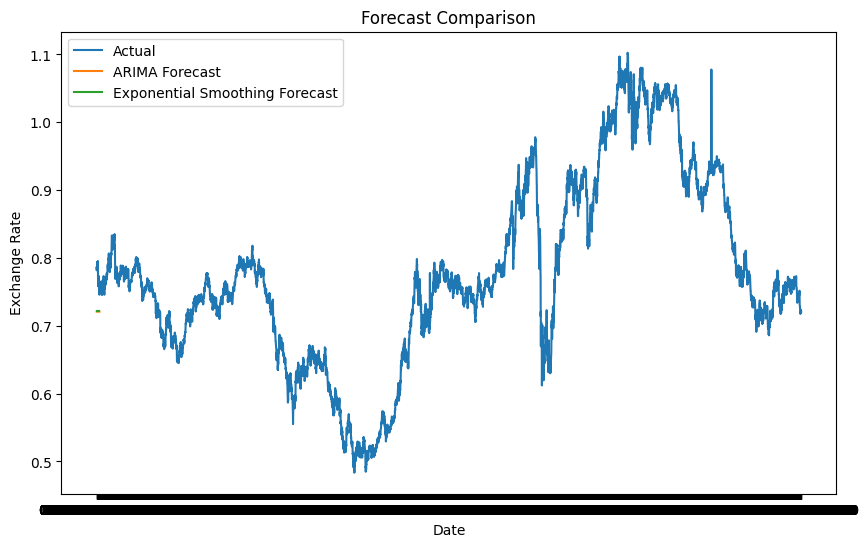

In [291]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual')
plt.plot([None for i in data] + [x for x in arima_forecast], label='ARIMA Forecast')
plt.plot([None for i in data] + [x for x in es_forecast], label='Exponential Smoothing Forecast')
plt.title('Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Conclusion

This report demonstrates the application of time series forecasting methods to predict future currency exchange rates. The Exponential Smoothing model outperformed the ARIMA model in terms of MAE. The analysis highlights the importance of careful model selection and parameter tuning.

